<a href="https://colab.research.google.com/github/Surajit96-lang/Codex_Techno_-/blob/main/CODEX_TECHNO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


IMPORT THE LIBRARIES



In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

UPLOAD THE DATA SET

In [3]:
from google.colab import files
upload=files.upload()

Saving retail_sales_dataset.csv to retail_sales_dataset.csv


GETTING INFORMATION FROM THE DATA SET

In [4]:
df=pd.read_csv('retail_sales_dataset.csv')
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,24-11-2023,CUST001,Male,34,Beauty,3,50,150
1,2,27-02-2023,CUST002,Female,26,Clothing,2,500,1000
2,3,13-01-2023,CUST003,Male,50,Electronics,1,30,30
3,4,21-05-2023,CUST004,Male,37,Clothing,1,500,500
4,5,06-05-2023,CUST005,Male,30,Beauty,2,50,100
5,6,25-04-2023,CUST006,Female,45,Beauty,1,30,30
6,7,13-03-2023,CUST007,Male,46,Clothing,2,25,50
7,8,22-02-2023,CUST008,Male,30,Electronics,4,25,100
8,9,13-12-2023,CUST009,Male,63,Electronics,2,300,600
9,10,07-10-2023,CUST010,Female,52,Clothing,4,50,200


As we can see their is no null value or missing value,so we can proceed to the next step

This is for age category statics

In [5]:
mean=df['Age'].mean()
print("mean:-",mean)
median=df['Age'].median()
print("median:-",median)
mode=df['Age'].mode()
print("mode:-",mode)
std_dev=df['Age'].std()
print("standard deviation:-",std_dev)

mean:- 41.392
median:- 42.0
mode:- 0    43
1    64
Name: Age, dtype: int64
standard deviation:- 13.681429659122532


This is for price for unit category

In [6]:
mean=df['Price per Unit'].mean()
print("mean:-",mean)
median=df['Price per Unit'].median()
print("median:-",median)
mode=df['Price per Unit'].mode()
print("mode:-",mode)
std_dev=df['Price per Unit'].std()
print("standard deviation:-",std_dev)

mean:- 179.89
median:- 50.0
mode:- 0    50
Name: Price per Unit, dtype: int64
standard deviation:- 189.68135627129138


This for Total amount

In [7]:
mean=df['Total Amount'].mean()
print("mean:-",mean)
median=df['Total Amount'].median()
print("median:-",median)
mode=df['Total Amount'].mode()
print("mode:-",mode)

mean:- 456.0
median:- 135.0
mode:- 0    50
Name: Total Amount, dtype: int64


# TIME SERIES ANALYSIS

/tmp/ipython-input-117839686.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


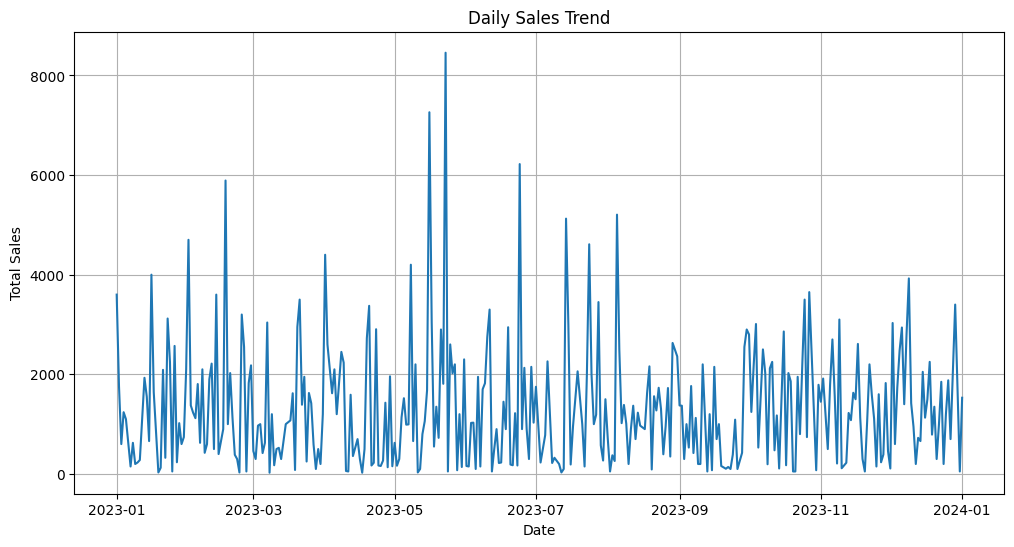

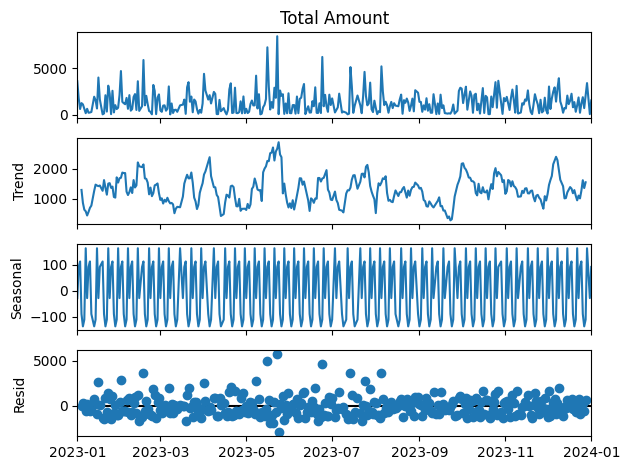

In [8]:
df['Date'] = pd.to_datetime(df['Date'])
daily_sales = df.groupby('Date').agg({'Total Amount': 'sum'}).reset_index()
daily_sales.set_index('Date', inplace=True)
plt.figure(figsize=(12,6))
plt.plot(daily_sales.index, daily_sales['Total Amount'])
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

decomp = seasonal_decompose(daily_sales['Total Amount'], model='additive', period=7)
decomp.plot()
plt.show()

daily_sales['7d_MA'] = daily_sales['Total Amount'].rolling(window=7).mean()


# Analyze customer demographics and purchasing behavior

   Gender  count
0  Female    510
1    Male    490
   Gender  Total Amount
0  Female        232840
1    Male        223160


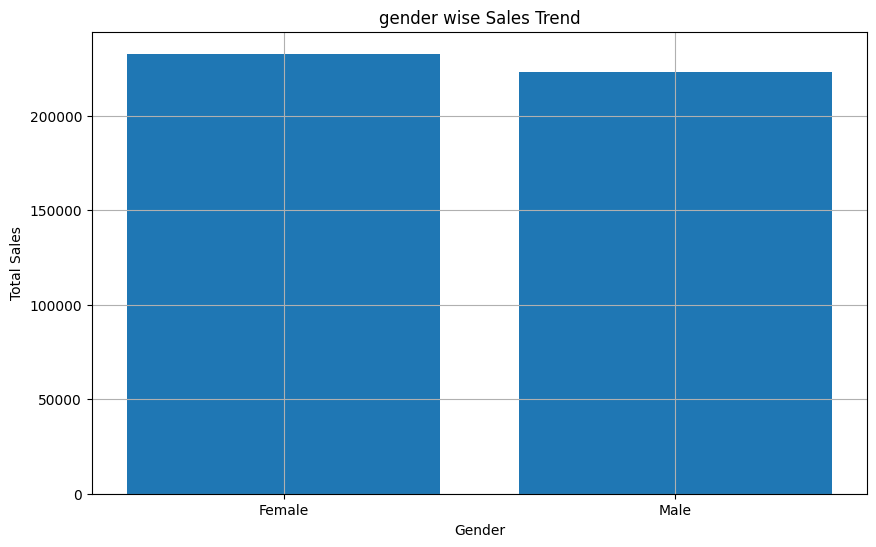

In [11]:
total_gender=df['Gender'].value_counts().reset_index()
print(total_gender)
gender_wise_sale=df.groupby('Gender').agg({'Total Amount':'sum'}).reset_index()
print(gender_wise_sale)
plt.figure(figsize=(10,6))
plt.bar(gender_wise_sale['Gender'],gender_wise_sale['Total Amount'])
plt.title("gender wise Sales Trend")
plt.xlabel("Gender")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

INSIGHTS OF BAR CHART BY CUSTOMER WISE TOTAL AMOUNT SALES

    Customer ID  Total Amount
0       CUST001           150
1       CUST002          1000
2       CUST003            30
3       CUST004           500
4       CUST005           100
..          ...           ...
995     CUST995            30
996     CUST996            50
997     CUST997            90
998     CUST998           100
999     CUST999           150

[1000 rows x 2 columns]


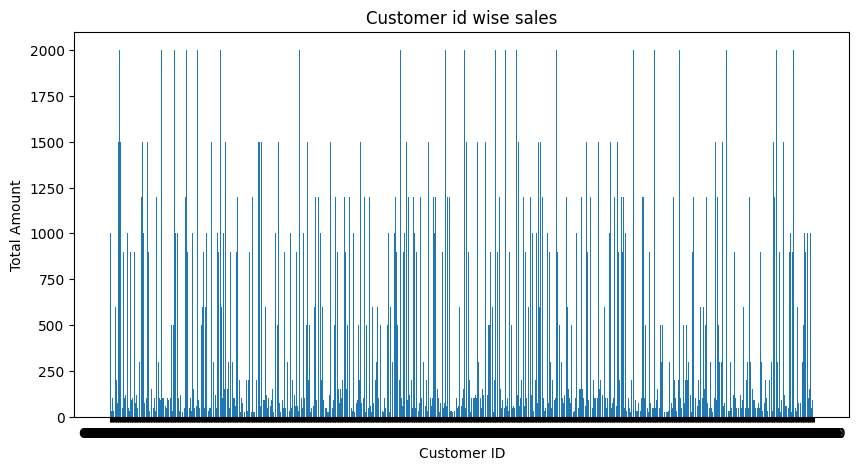

In [17]:
customer_wise=df.groupby('Customer ID').agg({'Total Amount':'sum'}).reset_index()
print(customer_wise)
plt.figure(figsize=(10,5))
plt.title("Customer id wise sales")
plt.xlabel("Customer ID")
plt.ylabel("Total Amount")
plt.bar(customer_wise['Customer ID'],customer_wise['Total Amount'])
plt.show()

PRODUCT CATEGORY WISE TOTAL AMOUNT SALES

  Product Category  Total Amount
0           Beauty        143515
1         Clothing        155580
2      Electronics        156905


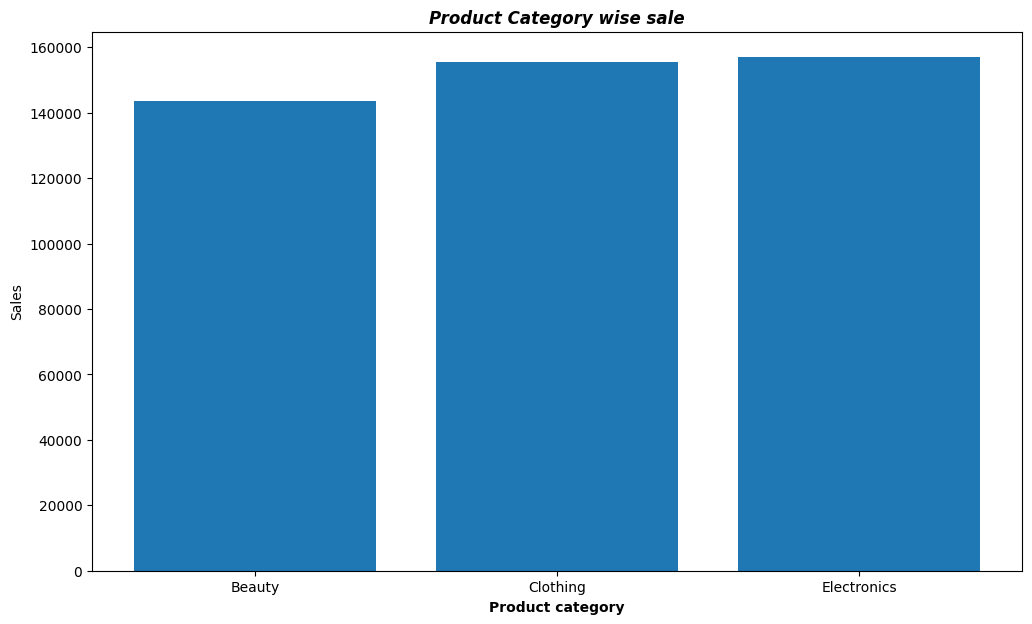

In [27]:
Product_wise=df.groupby("Product Category").agg({"Total Amount":"sum"}).reset_index()
print(Product_wise)
plt.figure(figsize=(12,7))
plt.title("Product Category wise sale",fontweight='bold',fontstyle='italic')
plt.xlabel("Product category",fontweight='bold')
plt.ylabel("Sales")
plt.bar(Product_wise["Product Category"],Product_wise["Total Amount"])
plt.show()

PER MONTH SALES BY LINE PLOT

          Date  Total Amount
0   2023-01-01          3600
1   2023-01-02          1765
2   2023-01-03           600
3   2023-01-04          1240
4   2023-01-05          1100
..         ...           ...
340 2023-12-27           700
341 2023-12-28          2075
342 2023-12-29          3400
343 2023-12-31            50
344 2024-01-01          1530

[345 rows x 2 columns]


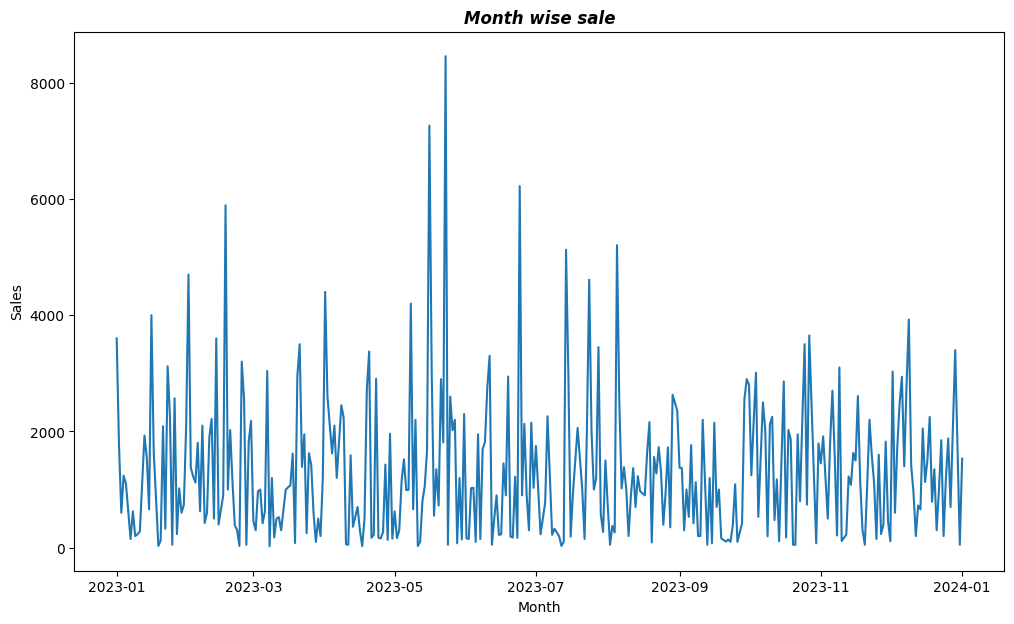

In [29]:
month_wise=df.groupby('Date').agg({'Total Amount':'sum'}).reset_index()
print(month_wise)
plt.figure(figsize=(12,7))
plt.title("Month wise sale",fontweight="bold",fontstyle="italic")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.plot(month_wise["Date"],month_wise["Total Amount"])
plt.show()

AGE WISE SALES

    Age  Total Amount
0    18         11215
1    19         14870
2    20          8645
3    21         12585
4    22         13700
5    23          8220
6    24          5415
7    25          9900
8    26         13980
9    27          9385
10   28          8670
11   29          6570
12   30          9790
13   31         10220
14   32          5550
15   33          6240
16   34         16785
17   35         11290
18   36          9105
19   37         11650
20   38         11100
21   39          4595
22   40          9415
23   41          5650
24   42          8500
25   43         17970
26   44          7560
27   45          6325
28   46         13090
29   47         12505
30   48          7240
31   49          5110
32   50          9845
33   51         16065
34   52          7040
35   53          9510
36   54         10505
37   55          9780
38   56          9440
39   57          9290
40   58          7395
41   59          9470
42   60         11590
43   61          6730
44   62   

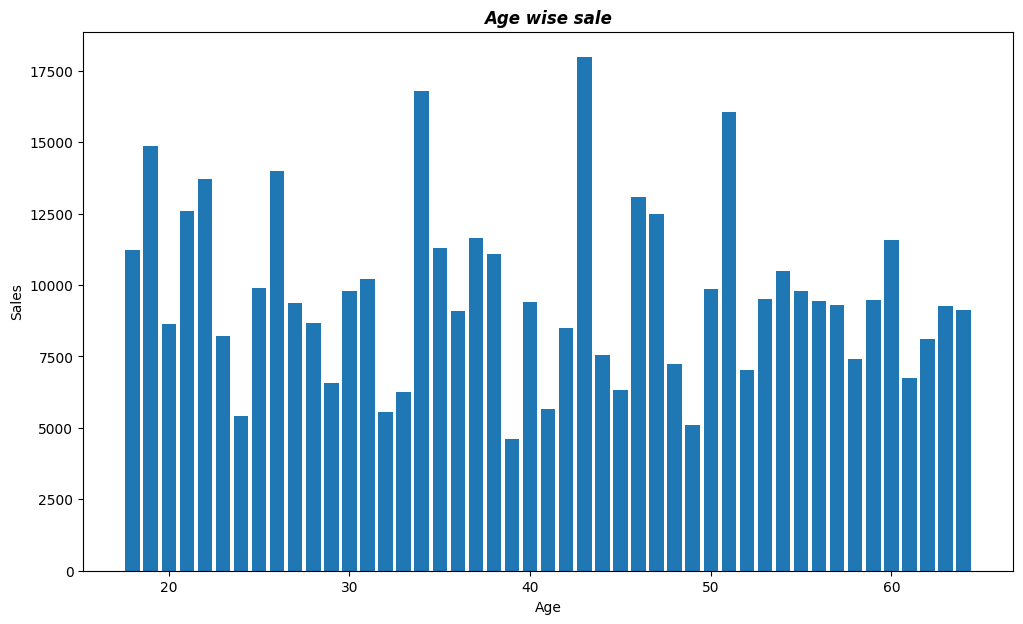

In [31]:
age_wise=df.groupby('Age').agg({'Total Amount':'sum'}).reset_index()
print(age_wise)
plt.figure(figsize=(12,7))
plt.title("Age wise sale",fontweight="bold",fontstyle="italic")
plt.xlabel("Age")
plt.ylabel("Sales")
plt.bar(age_wise["Age"],age_wise["Total Amount"])
plt.show()

RECOMMENDATION : -
1. Customer Demographics

Gender Wise: If one gender contributes more revenue (e.g., female customers buy more in fashion), target gender-specific promotions like male customer.

Age: If younger customers (18–25) prefer low-cost categories while older customers (40+) spend more per transaction, design tiered marketing campaigns (student discounts vs. premium bundles).

2. Product Categories

Identify top-performing categories (high sales + high margin) → increase inventory & promotions.

For low-performing categories → check demand seasonality, consider bundle offers, or discontinue if consistently underperforming.

3. Purchase Behavior

If repeat purchases are high → launch loyalty programs (points, coupons).

If purchases are mostly one-time → improve post-purchase engagement (email follow-ups, recommendations).

Identify high-value customers (top 10%) → offer exclusive discounts or memberships.

4. Sales Trends (Time Series)

Daily/Monthly Trends:

Peak sales days → increase stock, staff, and ads during those times.

Off-peak periods → launch flash sales or discount campaigns.